In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reset -f

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import caffe
caffe.set_mode_gpu()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import python.helpers as helpers

In [10]:
trainingLogFile = "logs/train_mnist.log"
modelPrototxt = "models/mnist_train_test.prototxt"
solverPrototxt = "models/mnist_solver.prototxt"
trainedModel = "snapshots/mnist_iter_10000.caffemodel"

In [20]:
#Train the net
os.system("bash run_training_pipeline.sh mnist gray")

0

In [23]:
net = caffe.Net(modelPrototxt, trainedModel, caffe.TEST)

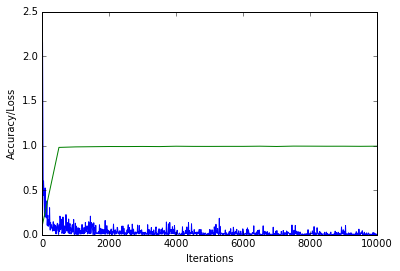

Baseline loss 2.30204
Baseline accuracy 0.0996


In [21]:
#Show training graph
iterations, losses = helpers.getLossFromTrainingFile(trainingLogFile)
plt.plot(iterations, losses)

iterations, accuracy = helpers.getAccuracyFromTrainingFile(trainingLogFile)
plt.plot(iterations, accuracy)
plt.xlabel("Iterations")
plt.ylabel("Accuracy/Loss")

plt.show()

print "Baseline loss " + losses[0]
print "Baseline accuracy " + accuracy[0]

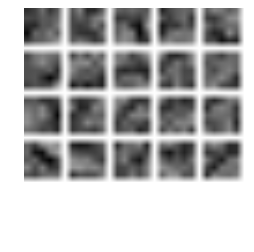

In [24]:
#Visualize learned filters from first layer
filters = net.params["conv1"][0].data
helpers.showFilterGrid(filters.transpose(0, 2, 3, 1), True)